In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=4, linewidth=500, threshold=500, suppress=True)
%matplotlib notebook

# Data Science Tools III: Predicting Employee Churn

![](images/logo.png)

Welcome to another Session from the datakirk. In this notebook we will be exploring data concerning employees at a company. Imagine the following situation: 

You are working for a data science consultancy. The client is concerned about retention of its high performing employees and has asked you to investigate how it can improve retention of such colleagues. The client is also interested in being able to predict exactly which of its employees is most at risk of leaving. To aid in this task, the client has provided some
data which includes attributes of its current and past employees. 

<img src="images/task.png" style="width: 800px;" />

The data provides the following attributes:

| Attribute             | Description                                                  |
| --------------------- | ------------------------------------------------------------ |
| satisfaction_level    | Employee satisfaction rating, ranging from 0 to 1, with 1 indicating the highest satisfaction level |
| last_evaluation       | Employee performance evaluation rating, ranging from 0 to 1, with 1 indicating a the highest performance level |
| average_monthly_hours | The average number of hours worked each month                |
| time_spend_company    | The number of years spent at the company                     |
| Work_accident         | Whether or not the employee was involved in a workplace accident. “1” indicates that they were, “0” indicates that they were not |
| promotion_last_5years | Whether or not the employee has been promoted at least once in the past five years. “1” indicates that they were, “0” indicates that they were not |
| department            | The department the employee is working in                    |
| salary                | The salary classification of the employee, ranging across “low”, “medium”, and “high” |
| left                  | Whether or not the employee has left the company             |


### What information can we find out from this dataset, and how can we predict whether an employee will leave?

In [17]:
#  read in the data

data = pd.read_csv('employees.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


# Initial Data Exploration

## Split the data into leavers and remainers

In [22]:
leavers = data[data['left'] == 1]
remainers = data[data['left'] == 0]

In [23]:
leavers

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [24]:
remainers

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
2000,0.58,0.74,4,215,3,0,0,sales,low,0
2001,0.82,0.67,2,202,3,0,0,sales,low,0
2002,0.45,0.69,5,193,3,0,0,sales,low,0
2003,0.78,0.82,5,247,3,0,0,sales,low,0
2004,0.49,0.60,3,214,2,0,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,1,management,high,0
14207,0.74,0.95,5,266,10,0,1,management,high,0
14208,0.85,0.54,3,185,10,0,1,management,high,0
14209,0.33,0.65,3,172,10,0,1,marketing,high,0


## Lets histogrm the columns for the remainers and leavers

<IPython.core.display.Javascript object>


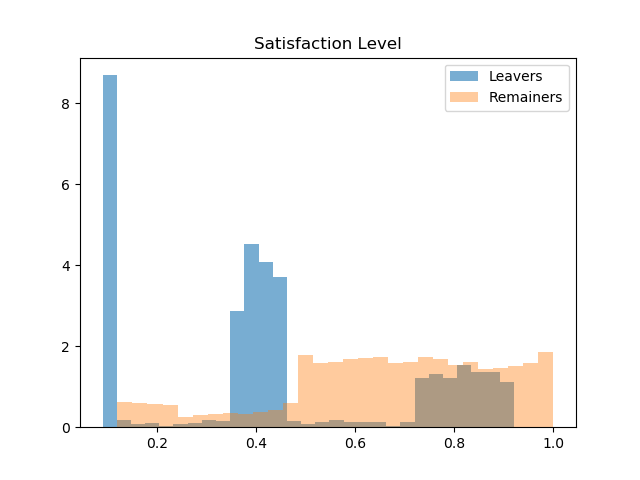

Text(0.5, 1.0, 'Satisfaction Level')

In [55]:
## satisfaction_level

plt.figure()

plt.hist(leavers['satisfaction_level'], bins=29, alpha=0.6, label='Leavers', density=True)
plt.hist(remainers['satisfaction_level'], bins=29, alpha=0.4, label='Remainers', density=True)

plt.legend()

plt.title('Satisfaction Level')

<IPython.core.display.Javascript object>


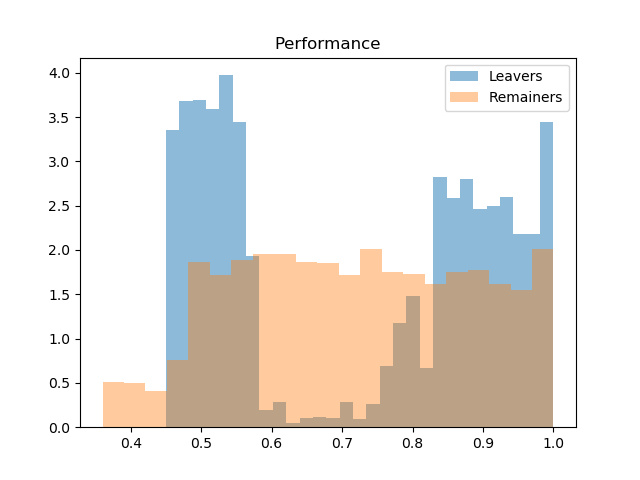

Text(0.5, 1.0, 'Performance')

In [119]:
## last evaluation

plt.figure()

plt.hist(leavers['last_evaluation'], bins=29, alpha=0.5, label='Leavers', density=True)
plt.hist(remainers['last_evaluation'], bins=21, alpha=0.4, label='Remainers', density=True)

plt.legend()

plt.title('Performance')

<IPython.core.display.Javascript object>


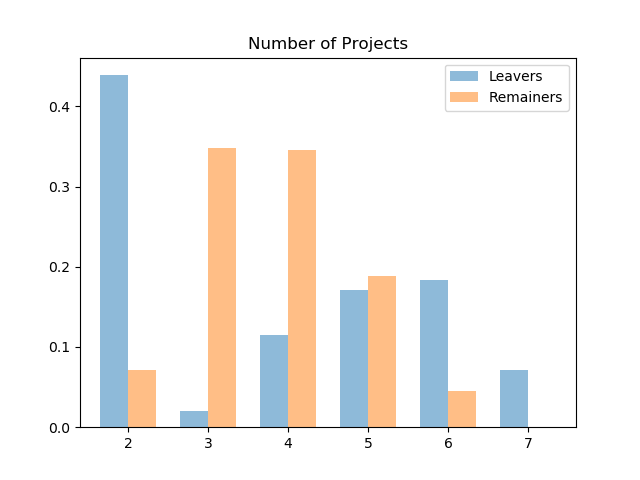

Text(0.5, 1.0, 'Number of Projects')

In [123]:
## number of projects

proj_count_leave = leavers['number_project'].value_counts().rename('Leavers')
proj_count_remain = remainers['number_project'].value_counts().rename('Remainers')

proj_count_leave /= proj_count_leave.sum()
proj_count_remain /= proj_count_remain.sum()

pd.concat([proj_count_leave, proj_count_remain], axis=1).plot.bar(alpha=0.5, width=0.7)

plt.legend()
plt.xticks(rotation=0)
plt.title('Number of Projects')

<IPython.core.display.Javascript object>


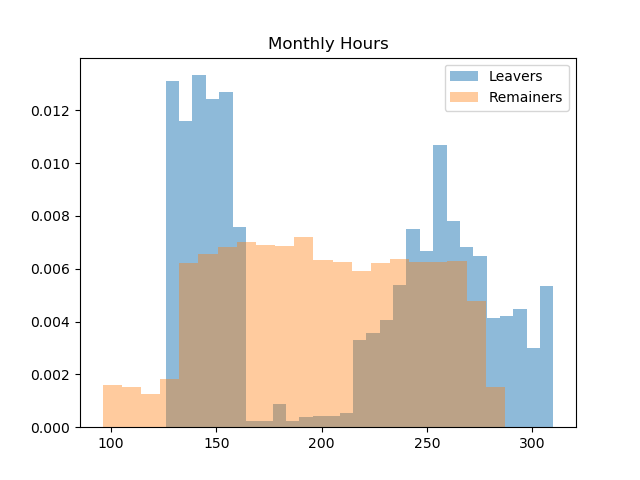

Text(0.5, 1.0, 'Monthly Hours')

In [122]:
## monthly hours

plt.figure()

plt.hist(leavers['average_montly_hours'], bins=29, alpha=0.5, label='Leavers', density=True)
plt.hist(remainers['average_montly_hours'], bins=21, alpha=0.4, label='Remainers', density=True)

plt.legend()

plt.title('Monthly Hours')

<IPython.core.display.Javascript object>


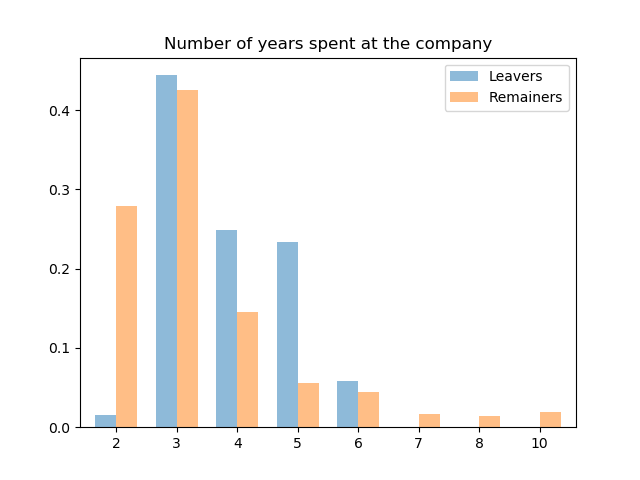

Text(0.5, 1.0, 'Number of years spent at the company')

In [124]:
## number of years at company

proj_count_leave = leavers['time_spend_company'].value_counts().rename('Leavers')
proj_count_remain = remainers['time_spend_company'].value_counts().rename('Remainers')

proj_count_leave /= proj_count_leave.sum()
proj_count_remain /= proj_count_remain.sum()

pd.concat([proj_count_leave, proj_count_remain], axis=1).plot.bar(alpha=0.5, width=0.7)

plt.legend()
plt.xticks(rotation=0)
plt.title('Number of years spent at the company')

<IPython.core.display.Javascript object>


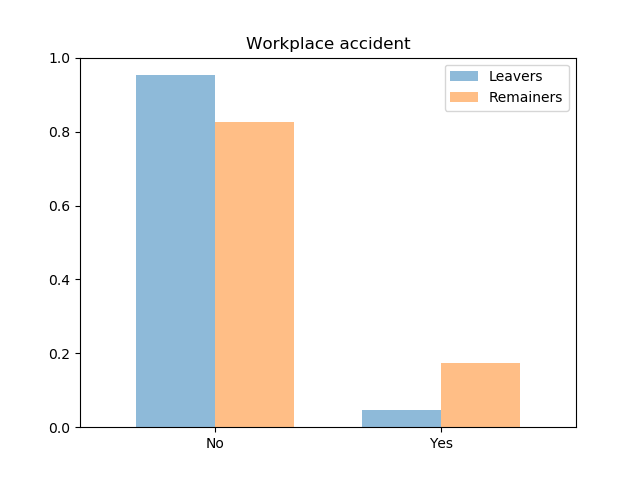

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

In [133]:
## Workplace accident

proj_count_leave = leavers['Work_accident'].value_counts().rename('Leavers')
proj_count_remain = remainers['Work_accident'].value_counts().rename('Remainers')

proj_count_leave /= proj_count_leave.sum()
proj_count_remain /= proj_count_remain.sum()

pd.concat([proj_count_leave, proj_count_remain], axis=1).plot.bar(alpha=0.5, width=0.7)

plt.legend()
plt.xticks(rotation=0)
plt.title('Workplace accident')

plt.gca().set_xticklabels(['No', 'Yes'])

<IPython.core.display.Javascript object>


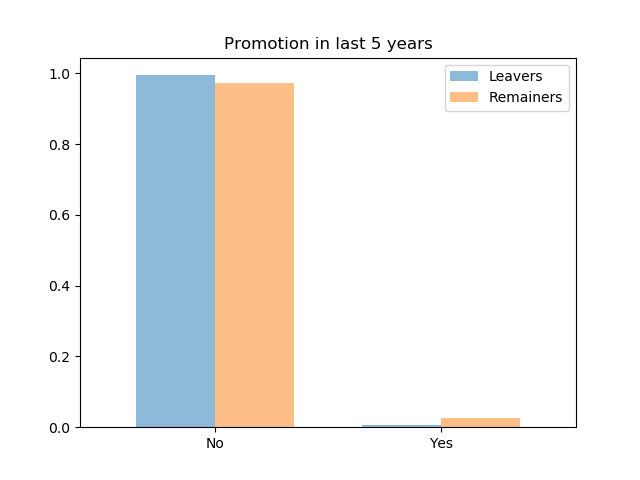

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

In [135]:
## Promotion in last 5 years

proj_count_leave = leavers['promotion_last_5years'].value_counts().rename('Leavers')
proj_count_remain = remainers['promotion_last_5years'].value_counts().rename('Remainers')

proj_count_leave /= proj_count_leave.sum()
proj_count_remain /= proj_count_remain.sum()

pd.concat([proj_count_leave, proj_count_remain], axis=1).plot.bar(alpha=0.5, width=0.7)

plt.legend()
plt.xticks(rotation=0)
plt.title('Promotion in last 5 years')

plt.gca().set_xticklabels(['No', 'Yes'])

<IPython.core.display.Javascript object>


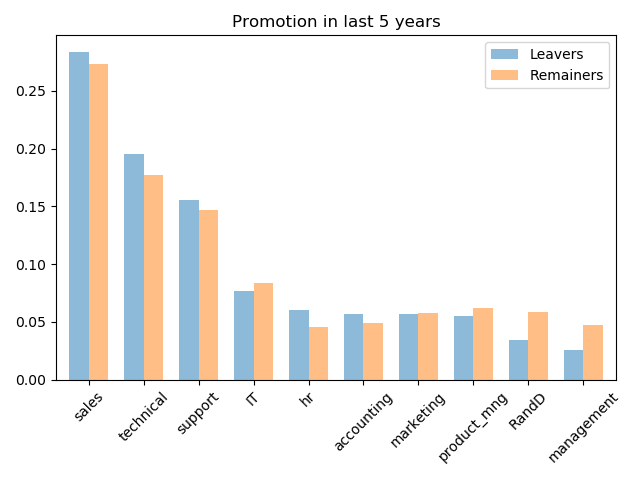

In [139]:
# department

proj_count_leave = leavers['department'].value_counts().rename('Leavers')
proj_count_remain = remainers['department'].value_counts().rename('Remainers')

proj_count_leave /= proj_count_leave.sum()
proj_count_remain /= proj_count_remain.sum()

pd.concat([proj_count_leave, proj_count_remain], axis=1).plot.bar(alpha=0.5, width=0.7)

plt.legend()
plt.xticks(rotation=45)
plt.title('Promotion in last 5 years')

plt.tight_layout()

<IPython.core.display.Javascript object>


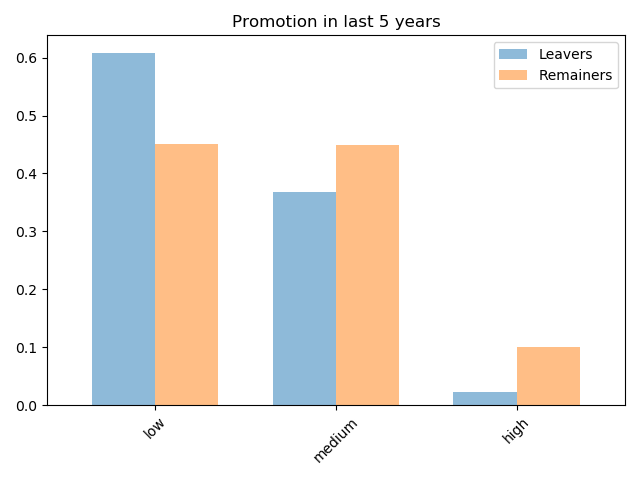

In [140]:
# Salary

proj_count_leave = leavers['salary'].value_counts().rename('Leavers')
proj_count_remain = remainers['salary'].value_counts().rename('Remainers')

proj_count_leave /= proj_count_leave.sum()
proj_count_remain /= proj_count_remain.sum()

pd.concat([proj_count_leave, proj_count_remain], axis=1).plot.bar(alpha=0.5, width=0.7)

plt.legend()
plt.xticks(rotation=45)
plt.title('Salary')

plt.tight_layout()

# Part 2: Prediction

## First, we need to one-hot-encode the categorical variables

In [153]:
data_one_hot = pd.get_dummies(data)
data_one_hot

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


## Now lets split our data into the features and the target

In [156]:
X, y = data_one_hot.drop('left', axis=1), data_one_hot['left']

## Next, it is good practice to scale the data columns to lie in roughly the same range

This can be achieved by subtracting the mean, and dividing by the standard deviation of each column

In [160]:
X = (X - X.mean()) / X.std()
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,-0.936463,-1.087239,-1.462814,-0.882010,-0.341224,-0.411152,-0.147407,-0.298476,-0.235313,-0.23214,-0.22764,-0.209384,-0.246314,-0.252945,1.619497,-0.417778,-0.47064,-0.299799,1.024741,-0.868103
1,0.752789,0.840679,0.971081,1.220382,1.713379,-0.411152,-0.147407,-0.298476,-0.235313,-0.23214,-0.22764,-0.209384,-0.246314,-0.252945,1.619497,-0.417778,-0.47064,-0.299799,-0.975791,1.151860
2,-2.022412,0.957522,2.593677,1.420610,0.343644,-0.411152,-0.147407,-0.298476,-0.235313,-0.23214,-0.22764,-0.209384,-0.246314,-0.252945,1.619497,-0.417778,-0.47064,-0.299799,-0.975791,1.151860
3,0.431027,0.899101,0.971081,0.439493,1.028511,-0.411152,-0.147407,-0.298476,-0.235313,-0.23214,-0.22764,-0.209384,-0.246314,-0.252945,1.619497,-0.417778,-0.47064,-0.299799,1.024741,-0.868103
4,-0.976684,-1.145661,-1.462814,-0.841965,-0.341224,-0.411152,-0.147407,-0.298476,-0.235313,-0.23214,-0.22764,-0.209384,-0.246314,-0.252945,1.619497,-0.417778,-0.47064,-0.299799,1.024741,-0.868103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.856023,-0.853552,-1.462814,-1.002147,-0.341224,-0.411152,-0.147407,-0.298476,-0.235313,-0.23214,-0.22764,-0.209384,-0.246314,-0.252945,-0.617434,2.393459,-0.47064,-0.299799,1.024741,-0.868103
14995,-0.976684,-1.379348,-1.462814,-0.821942,-0.341224,-0.411152,-0.147407,-0.298476,-0.235313,-0.23214,-0.22764,-0.209384,-0.246314,-0.252945,-0.617434,2.393459,-0.47064,-0.299799,1.024741,-0.868103
14996,-0.976684,-1.087239,-1.462814,-1.162329,-0.341224,-0.411152,-0.147407,-0.298476,-0.235313,-0.23214,-0.22764,-0.209384,-0.246314,-0.252945,-0.617434,2.393459,-0.47064,-0.299799,1.024741,-0.868103
14997,-2.022412,1.424896,1.782379,1.580792,0.343644,-0.411152,-0.147407,-0.298476,-0.235313,-0.23214,-0.22764,-0.209384,-0.246314,-0.252945,-0.617434,2.393459,-0.47064,-0.299799,1.024741,-0.868103


## It's now super important to split our data into a training set and a test set!!

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [168]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
9046,1.315873,0.548570,0.159782,0.719812,-0.341224,2.432031,-0.147407,-0.298476,-0.235313,-0.232140,-0.227640,-0.209384,-0.246314,-0.252945,-0.617434,-0.417778,2.124626,-0.299799,1.024741,-0.868103
5266,0.752789,1.600162,-0.651516,-0.861988,-0.341224,-0.411152,-0.147407,-0.298476,-0.235313,-0.232140,-0.227640,-0.209384,-0.246314,-0.252945,1.619497,-0.417778,-0.470640,-0.299799,1.024741,-0.868103
8660,0.953891,-0.911974,-0.651516,-0.841965,-0.341224,-0.411152,-0.147407,-0.298476,-0.235313,-0.232140,4.392614,-0.209384,-0.246314,-0.252945,-0.617434,-0.417778,-0.470640,-0.299799,-0.975791,1.151860
3082,-0.936463,0.548570,0.971081,-1.462671,-0.341224,2.432031,-0.147407,-0.298476,-0.235313,4.307456,-0.227640,-0.209384,-0.246314,-0.252945,-0.617434,-0.417778,-0.470640,-0.299799,1.024741,-0.868103
5383,1.114772,-1.262504,0.159782,-1.302489,-1.026091,2.432031,-0.147407,-0.298476,-0.235313,-0.232140,-0.227640,-0.209384,-0.246314,-0.252945,-0.617434,-0.417778,2.124626,-0.299799,1.024741,-0.868103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10019,0.350586,0.431727,-0.651516,0.499562,0.343644,-0.411152,-0.147407,-0.298476,-0.235313,-0.232140,-0.227640,-0.209384,-0.246314,-0.252945,1.619497,-0.417778,-0.470640,-0.299799,-0.975791,1.151860
11013,-0.413600,0.490148,0.159782,-0.061076,1.713379,-0.411152,-0.147407,-0.298476,-0.235313,-0.232140,-0.227640,-0.209384,4.059588,-0.252945,-0.617434,-0.417778,-0.470640,-0.299799,-0.975791,1.151860
3353,-0.091837,1.191209,0.159782,-0.101122,-1.026091,-0.411152,-0.147407,-0.298476,4.249382,-0.232140,-0.227640,-0.209384,-0.246314,-0.252945,-0.617434,-0.417778,-0.470640,-0.299799,-0.975791,1.151860
5403,0.270146,0.548570,-0.651516,-0.701805,-1.026091,-0.411152,-0.147407,3.350131,-0.235313,-0.232140,-0.227640,-0.209384,-0.246314,-0.252945,-0.617434,-0.417778,-0.470640,-0.299799,-0.975791,1.151860


## We are now ready to choose and apply a predictive model

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
model1 = KNeighborsClassifier()

model1.fit(X_train, y_train)

KNeighborsClassifier()

## Analyse the model

In [175]:
from sklearn.metrics import plot_confusion_matrix

<IPython.core.display.Javascript object>


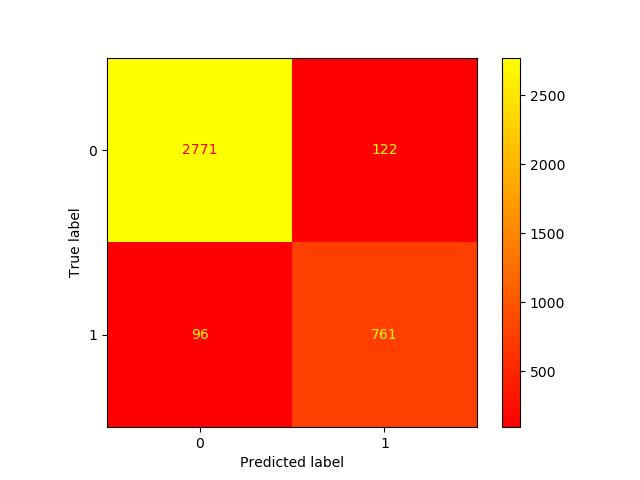

In [179]:
plot_confusion_matrix(model1, X_test, y_test, cmap='autumn')

## Let's try a more advanced model

In [180]:
from sklearn.svm import LinearSVC

In [181]:
model2 = LinearSVC()

model2.fit(X_train, y_train)

/home/ed/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

<IPython.core.display.Javascript object>


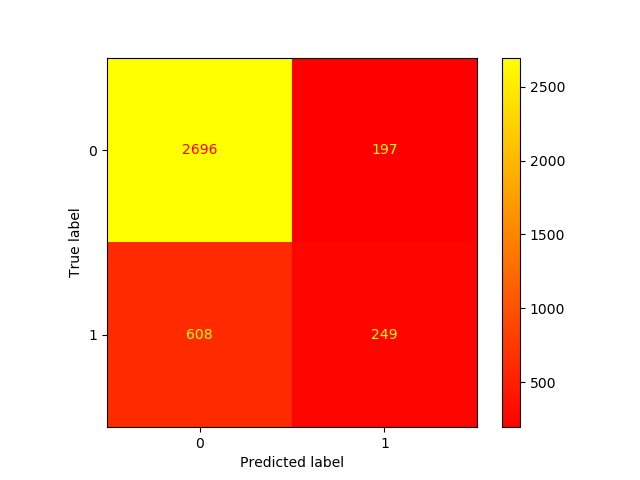

In [182]:
plot_confusion_matrix(model2, X_test, y_test, cmap='autumn')